## **Ejercicio 3**

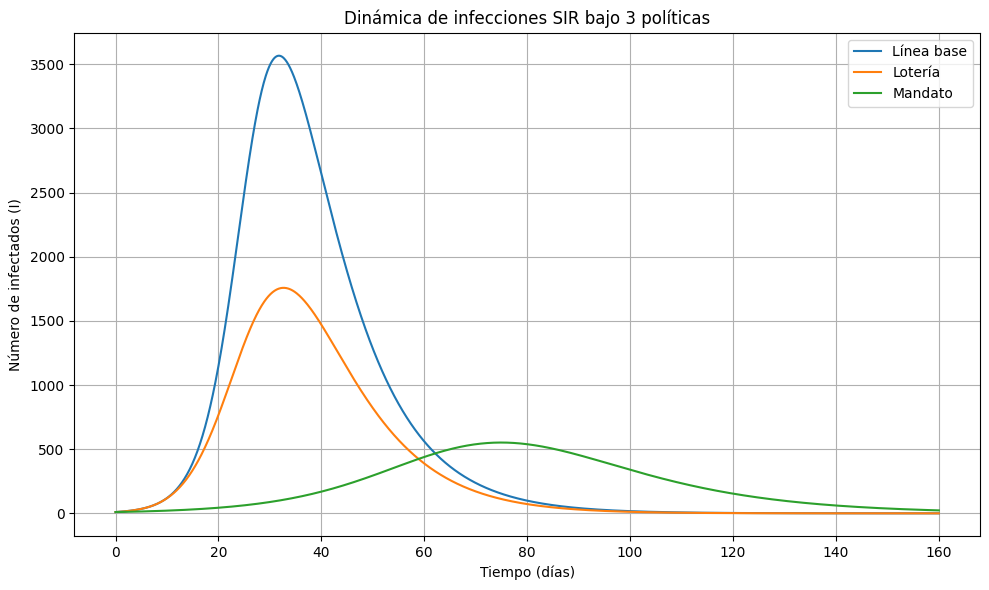

Total infectados acumulados (base):    9660
Total infectados acumulados (lotería): 5566
Total infectados acumulados (mandato): 3553


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parámetros
N = 10_000         # Población total
I0 = 10            # Infectados iniciales
beta = 0.35        # Tasa de transmisión
gamma = 0.1        # Tasa de recuperación

# Vector de tiempo (0–160 días, paso 0.1)
t = np.linspace(0, 160, 1601)

# Ecuaciones SIR extendidas con vacunación y contador de casos
def sir(y, t, v):
    S, I, R, C = y
    dSdt = -beta * S * I / N - v * S
    dIdt =  beta * S * I / N - gamma * I
    dRdt =              gamma * I + v * S
    dCdt =      beta * S * I / N
    return [dSdt, dIdt, dRdt, dCdt]

# a) Línea base: v = 0
def sir_base(y, t):
    return sir(y, t, v=0.0)

# b) Lotería: v = 0.02/día una vez que C > 100
def sir_lottery(y, t):
    v = 0.02 if y[3] > 100 else 0.0
    return sir(y, t, v)

# c) Mandato: sin vacunación dinámica, pero S0 reducido al 50%
def sir_mandate(y, t):
    return sir(y, t, v=0.0)

# Condiciones iniciales
# Para base y lotería: ninguno está recuperado ni vacunado al inicio, 
# pero C0 = I0 para contar los casos iniciales
y0_base    = [N - I0, I0, 0.0, I0]
y0_lottery = [N - I0, I0, 0.0, I0]

# Para mandato: 50% de susceptibles se vacunan inmediatamente
S0_mandate = 0.5 * (N - I0)
R0_mandate = 0.5 * (N - I0)  # inmunizados por mandato
y0_mandate = [S0_mandate, I0, R0_mandate, I0]

# Integración numérica
sol_base    = odeint(sir_base,    y0_base,    t)
sol_lottery = odeint(sir_lottery, y0_lottery, t)
sol_mandate = odeint(sir_mandate, y0_mandate, t)

# Extraer series de infectados y acumulados
I_base    = sol_base[:, 1]
I_lottery = sol_lottery[:, 1]
I_mandate = sol_mandate[:, 1]

C_base    = sol_base[:, 3]
C_lottery = sol_lottery[:, 3]
C_mandate = sol_mandate[:, 3]

# Gráfico de dinámicas de infectados
plt.figure(figsize=(10,6))
plt.plot(t, I_base,    label='Línea base')
plt.plot(t, I_lottery, label='Lotería')
plt.plot(t, I_mandate, label='Mandato')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de infectados (I)')
plt.title('Dinámica de infecciones SIR bajo 3 políticas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Recuento final de infectados (acumulados)
print(f"Total infectados acumulados (base):    {C_base[-1]:.0f}")
print(f"Total infectados acumulados (lotería): {C_lottery[-1]:.0f}")
print(f"Total infectados acumulados (mandato): {C_mandate[-1]:.0f}")


# Análisis de resultados de la simulación SIR

Se modelaron tres políticas sobre una población de $N = 10\,000$ y condiciones iniciales $(I_0 = 10,\; S_0 = N - I_0)$, con parámetros $\beta = 0.35$, $\gamma = 0.1$.  

| **Política**    | **$C_{\infty}$ (casos acumulados)** | **% población infectada** | **Reducción vs. base** |
|-----------------|-------------------------------------|---------------------------|------------------------|
| **Base**        | 9 660                               | 96,6 %                    | –                      |
| **Lotería**     | 5 566                               | 55,7 %                    | 42,4 %                 |
| **Mandato**     | 3 553                               | 35,5 %                    | 63,2 %                 |

---

## 1. Línea base

- Sin ninguna intervención, el modelo predice que casi toda la población se infecta.
- Esto concuerda con el tamaño final de la epidemia para  
  $$R_0 = \frac{\beta}{\gamma} = \frac{0.35}{0.1} = 3.5$$  
  y la ecuación implícita  
  $$C_\infty = N\Bigl(1 - e^{-R_0 \, C_\infty/N}\Bigr).$$

---

## 2. Política “Lotería”

- Se activa vacunación lenta ($v = 0.02$/día) tras superar 100 casos acumulados.
- **Impacto**:  
  - Casos caen de 9 660 → 5 566  
  - Infectados reducidos en **42,4 %** vs. línea base.  
- **Interpretación**:  
  - La vacunación reactiva frena la transmisión, pero llega tarde para cortar la curva en su fase ascendente.

---

## 3. Política “Mandato”

- Inmuniza inmediatamente al 50 % de los susceptibles antes de iniciar la dinámica.
- **Impacto**:  
  - Casos caen de 9 660 → 3 553  
  - Infectados reducidos en **63,2 %** vs. línea base.  
- **Interpretación**:  
  - Reducir drásticamente $S(0)$ achata y retrasa el pico, evitando la mayoría de los contagios.

---

## 4. Comparación visual

- El **pico** de infectados $I(t)$ se:
  - Más alto y temprano en la base.
  - Más bajo y algo retrasado en la lotería.
  - Mucho más bajo y muy retrasado en el mandato.
- El área bajo la curva $I(t)$ (carga epidémica) es mínima con mandato.

---

## 5. Conclusión

- **Mandato** > **Lotería** > **Sin intervención** en términos de reducción de casos.
- Intervenciones tempranas y de gran cobertura (mandato) son las más efectivas para minimizar la epidemia.
